In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_columns = ['Feature1', 'Feature2']
data = pd.read_csv('/content/drive/MyDrive/Test/PR lab water/test-Minimum-Error-Rate-Classifier.txt', sep = ',', names = my_columns, header = None)
print(data)

   Feature1  Feature2
0         1       1.0
1         1      -1.0
2         4       5.0
3        -2       2.5
4         0       2.0
5         2      -3.0


## Task 1

In [ ]:
testX = data.iloc[:, :].to_numpy()
print(testX)

[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]]


In [ ]:
omega1 = 0.5
mean1 = np.array([0, 0])
varaince1 = np.array([[0.25, 0.30],[0.30, 1.00]])

omega2 = 0.5
mean2 = np.array([2, 2])
varaince2 = np.array([[0.50, 0.00],[0.00, 0.50]])

In [ ]:
def normalDistribution(x, mean, variance):
  rslt = np.zeros((x.shape[0],))
  for i in range(x.shape[0]):
    xi = x[i, :]
    rslt[i,] = np.exp(- 0.5 * np.dot((xi - mean).T, np.dot(np.linalg.inv(variance), (xi - mean)))) / math.sqrt(((2 * math.pi) ** x.shape[1]) * np.linalg.det(variance))
  return rslt

In [ ]:
normal1 = normalDistribution(testX, mean1, varaince1) * omega1
normal2 = normalDistribution(testX, mean2, varaince2) * omega2
print(normal1, "\n", normal2)

[2.60957317e-02 6.13712786e-04 2.44194018e-15 4.76386919e-13
 8.74097521e-03 8.52320872e-15] 
 [2.15392793e-02 7.22562324e-06 3.59742598e-07 1.39487343e-08
 2.91502447e-03 2.21033492e-12]


## Task 2

In [ ]:
data = {'X1': [], 'X2': [], 'Probability Density Function': [], 'Size': [], 'Symbol': [], 'Color': []}
symbol = []

nor1 = normal1 / omega1
nor2 = normal2 / omega2

for i in range(testX.shape[0]):
    print(testX[i, :], 'are in', end=' ')
    if nor1[i] > nor2[i]:
        data['X1'].append(testX[i, 0])
        data['X2'].append(testX[i, 1])
        print('Class 1')
    else:
        data['X1'].append(testX[i, 0])
        data['X2'].append(testX[i, 1])
        print('Class 2')

[1. 1.] are in Class 1
[ 1. -1.] are in Class 1
[4. 5.] are in Class 2
[-2.   2.5] are in Class 2
[0. 2.] are in Class 1
[ 2. -3.] are in Class 2


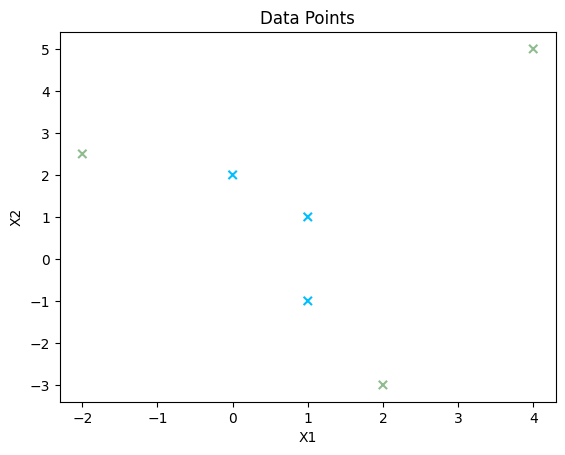

In [ ]:
plt.scatter(dataPoint['X1'], dataPoint['X2'], c=dataPoint['Color'], marker='x')

plt.title('Data Points')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

# Task 3

In [ ]:
pointsX1 = np.linspace(-6, 6, 500)
pointsX2 = np.linspace(-6, 6, 500)
pointsPDF = np.zeros((500, 500))

for i in range(len(pointsX1)):
    for j in range(len(pointsX2)):
        nm1 = normalDistribution(np.array([[pointsX1[i], pointsX2[j]]]), mean1, varaince1)
        nm2 = normalDistribution(np.array([[pointsX1[i], pointsX2[j]]]), mean2, varaince2)

    pointsPDF[i][j] = max(nm1[0], nm2[0])

layout = go.Layout(title = 'Minimum Error Rate Classifier (Without Decision Boundary)', width = 1500, height = 1000)

data = [go.Surface(name = 'Gaussian Distribution', z = pointsPDF, x = pointsX1, y = pointsX2)]

fig = go.Figure(data = data, layout = layout)

fig.update_traces(contours_z = dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))

fig.add_scatter3d(name = 'Test Point Location', x = dataPoint['X1'].to_list(), y = dataPoint['X2'].to_list(), z = dataPoint['Probability Density Function'].to_list(), showlegend = True, mode = 'markers', marker = dict(size = 10, color = dataPoint['Color'], symbol = symbol))

fig.show()

#Task 4

In [ ]:
dbZ = np.zeros((500, 500))
for i in range(len(pointsX1)):
  for j in range(len(pointsX2)):
    nm1 = normalDistribution(np.array([[pointsX1[i], pointsX2[j]]]), mean1, varaince1)
    nm2 = normalDistribution(np.array([[pointsX1[i], pointsX2[j]]]), mean2, varaince2)

    # Try different values like 1.0, 0.5, 0.05 etc and see the decision boundaries drawn from it
    if abs((np.log10(nm1[0]) - np.log10(nm2[0])) - np.log10(omega1) + np.log10(omega2)) < 0.1:
      dbZ[i][j] = 0.5
    else:
      dbZ[i][j] = pointsPDF[i][j]

In [ ]:
layout = go.Layout(title = 'Minimum Error Rate Classifier', showlegend = True, width = 1500, height = 1000)

data = [go.Surface(name = 'Gaussian Distribution', z = pointsPDF, x = pointsX1, y = pointsX2)]

fig = go.Figure(data = data, layout = layout)

fig.update_traces(contours_z = dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))

fig.add_scatter3d(name = 'Points', x = dataPoint['X1'].to_list(), y = dataPoint['X2'].to_list(),
                  z = dataPoint['Probability Density Function'].to_list(), showlegend = True, mode = 'markers',
                  marker = dict(size = 10, color = dataPoint['Color'], symbol = symbol))
fig.add_surface(name = 'Decision Boundary', z = dbZ,  x = pointsX1, y = pointsX2, colorscale = 'greens', showscale = False, opacity = 0.9)

fig.show()